In [30]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime # manipulating date formats
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [6]:
train_df = pd.read_csv("../input/newsdata.csv")

In [29]:
print("Train shape : ", train_df.shape)

Train shape :  (124989, 7)


In [11]:
## target count ##
cnt_srs = train_df['category'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=900,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

As we can clearly see that more that **37% of the news are about** **politics & entertainment**. And also interesting to see that **Education, College, Science & Tech** lies on the very bottom. Interesting. !!

In [28]:
# Check for Missing Data

train_df.isnull().sum()

Unnamed: 0               0
authors              14151
category                 0
date                     0
headline                 6
link                     0
short_description    19590
dtype: int64

In [34]:
# How many articles author has written

train_df['authors'].value_counts()

Lee Moran                                                                                             2423
Ron Dicker                                                                                            1802
Ed Mazza                                                                                              1320
Cole Delbyck                                                                                          1140
Andy McDonald                                                                                         1065
Julia Brucculieri                                                                                     1059
Carly Ledbetter                                                                                       1023
Curtis M. Wong                                                                                        1005
Mary Papenfuss                                                                                         974
Bill Bradley                         

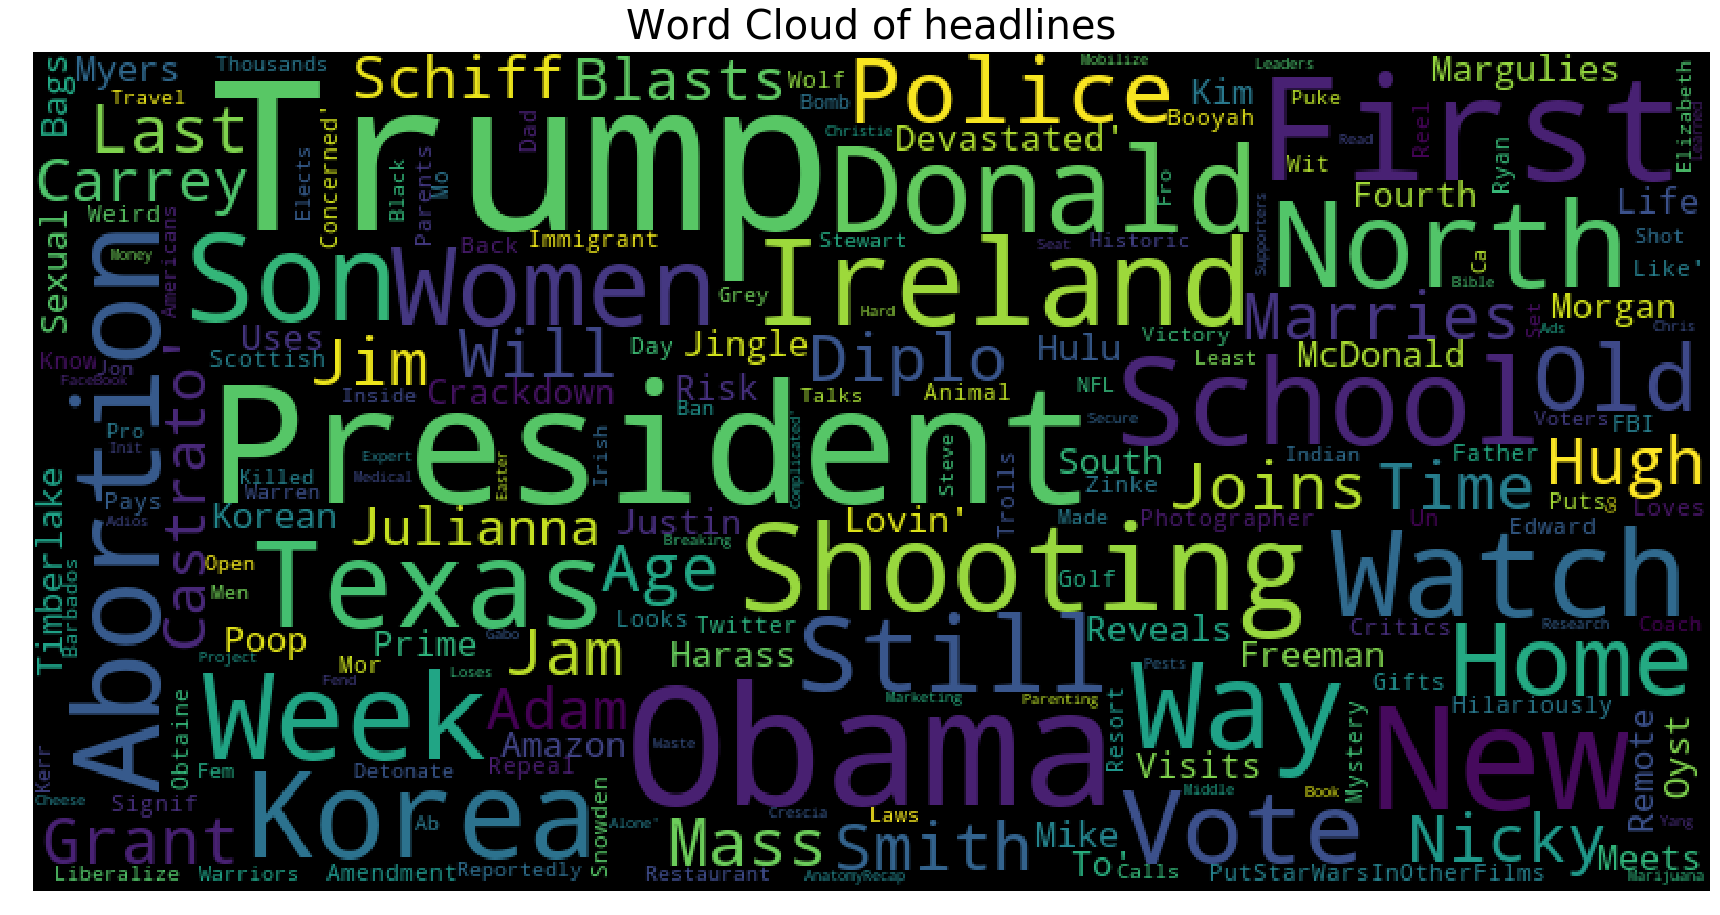

In [25]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train_df["headline"], title="Word Cloud of headlines")

Not just Politics covers the most of the headlines rather **President Donald Trump** clearly appears the most number of times.

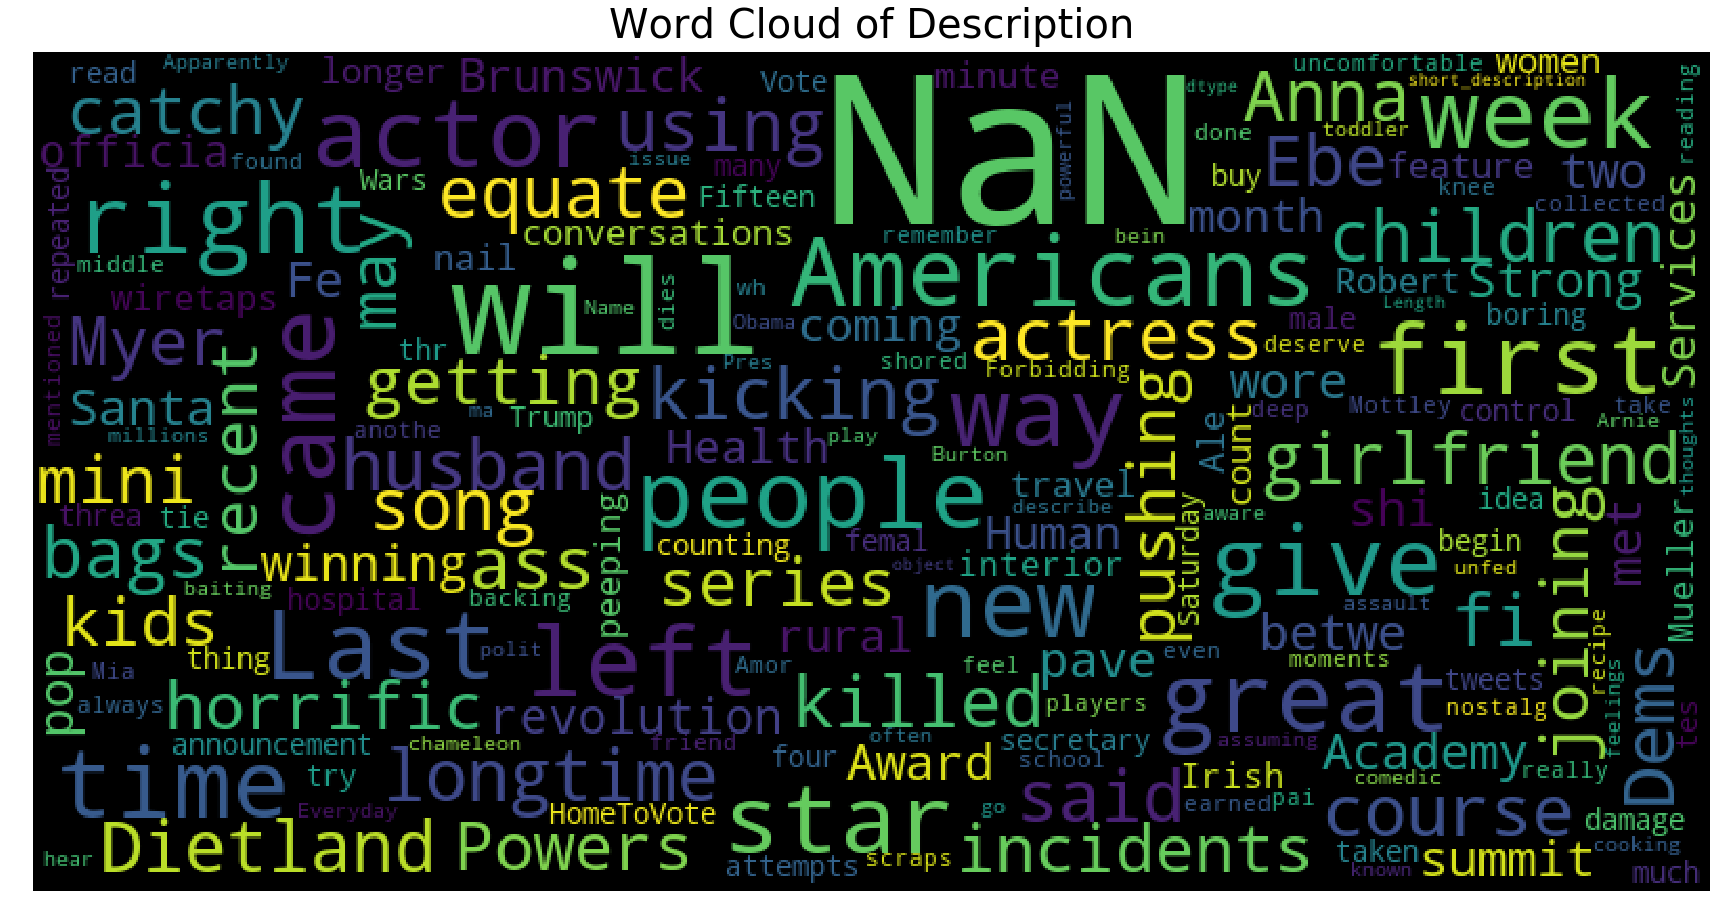

In [26]:
plot_wordcloud(train_df["short_description"], title="Word Cloud of Description")